<a href="https://colab.research.google.com/github/sulavpanthi/Deep-learning/blob/master/lin_reg_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating dataset


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
features = np.array(boston.data)
labels = np.array(boston.target)

In [0]:
n_training_samples = features.shape[0]
n_dim = features.shape[1]

In [207]:
print(n_training_samples)
print(n_dim)

506
13


In [0]:
def normalize(dataset):
  mu = np.mean(dataset)
  sigma = np.std(dataset)
  return (dataset-mu)/sigma

In [209]:
features_norm = normalize(features)
train_x = np.transpose(features_norm)
train_y = np.transpose(labels)
print(train_x.shape)
print(train_y.shape)

(13, 506)
(506,)


In [210]:
train_y = train_y.reshape(1,len(train_y))
print(train_y.shape)

(1, 506)


# Constructing Graph

In [0]:
# tf.reset_default_graph()

x = tf.placeholder(tf.float32, [n_dim, None], name = 'x')
y = tf.placeholder(tf.float32, [1, None], name = 'y')



In [0]:


w = tf.Variable(np.random.normal(), name = 'w')
b = tf.Variable(np.random.normal, name = 'b')


In [0]:

y_pred = tf.add(tf.multiply(w, x), b)



In [0]:
loss = tf.reduce_mean(tf.square(y_pred - y))

# Computing Graph

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
train_op = optimizer.minimize(loss)

0 loss 398.34268
1 loss 285.29318
2 loss 212.94151
3 loss 166.63647
4 loss 137.00119
5 loss 118.034645
6 loss 105.89602
7 loss 98.12733
8 loss 93.15535
9 loss 89.97327
10 loss 87.93675
11 loss 86.63339
12 loss 85.79922
13 loss 85.26537
14 loss 84.92369
15 loss 84.70502
16 loss 84.56509
17 loss 84.475494
18 loss 84.41819
19 loss 84.3815
20 loss 84.358
21 loss 84.34298
22 loss 84.333405
23 loss 84.32721
24 loss 84.323296
25 loss 84.32075
26 loss 84.31915
27 loss 84.318115
28 loss 84.31748
29 loss 84.317055
predicting


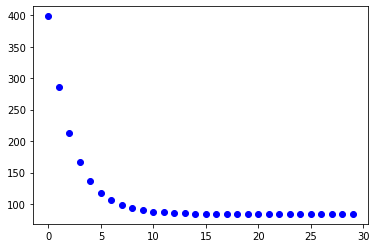

In [216]:
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  feed_dict = {x:train_x, y:train_y}
  for i in range(30):
    _ = session.run(train_op, feed_dict)
    print(i, "loss", loss.eval(feed_dict))
    plt.plot(i, loss.eval(feed_dict), 'bo')

  print('predicting')
  y_pred_batch = session.run(y_pred, {x:train_x})

In [0]:
# plt.scatter(train_x, train_y)
# plt.plot(train_x, y_pred_batch, color='red')
# plt.xlim(0, 2)
# plt.ylim(0, 2)
# plt.savefig('plot.png')